In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('best_results/ensemble_3_best_average_best.csv')
# df = df[df['folder_name'].str.contains('DA2')]
df = df[~df['folder_name'].str.contains('DA0')]
df = df[~df['folder_name'].str.contains('DA4')]
df = df[~df['folder_name'].str.contains('moredata')]
df = df[~df['folder_name'].str.contains('train_classifier_only')]
# df = df[(df['folder_name'] == 'noDA_noPP_2') | 
#         (df['folder_name'] == 'DA2_dull_razor_shades_of_gray_cropped_images_folder') | 
#         (df['folder_name'] == 'DA2_dull_razor_shades_of_gray_cropped_images_folder_moredata') | 
#         (df['folder_name'] == 'DA2_noPP_2') |
#         (df['folder_name'] == 'dull_razor_shades_of_gray_2')]
df = df.sort_values(by=['balanced_accuracy'], ascending=False)
df = df[['folder_name','balanced_accuracy']]
print(df)

                                          folder_name  balanced_accuracy
1   DA2_dull_razor_shades_of_gray_cropped_images_f...           0.813199
12  DA2_shades_of_gray_cropped_images_folder_150_e...           0.810045
4   DA2_cropped_images_folder_150_epochs_lr_init_0001           0.805811
20     DA2_shades_of_gray_CLAHE_cropped_images_folder           0.801007
3                                          DA2_noPP_2           0.793858
18                                    noDA_dull_razor           0.787915
17                                   shades_of_gray_2           0.784644
15                        dull_razor_shades_of_gray_2           0.779781
6                                    noDA_PPcropped_2           0.770270
19                                        noDA_noPP_2           0.767052
8                                          noDA_CLAHE           0.761976


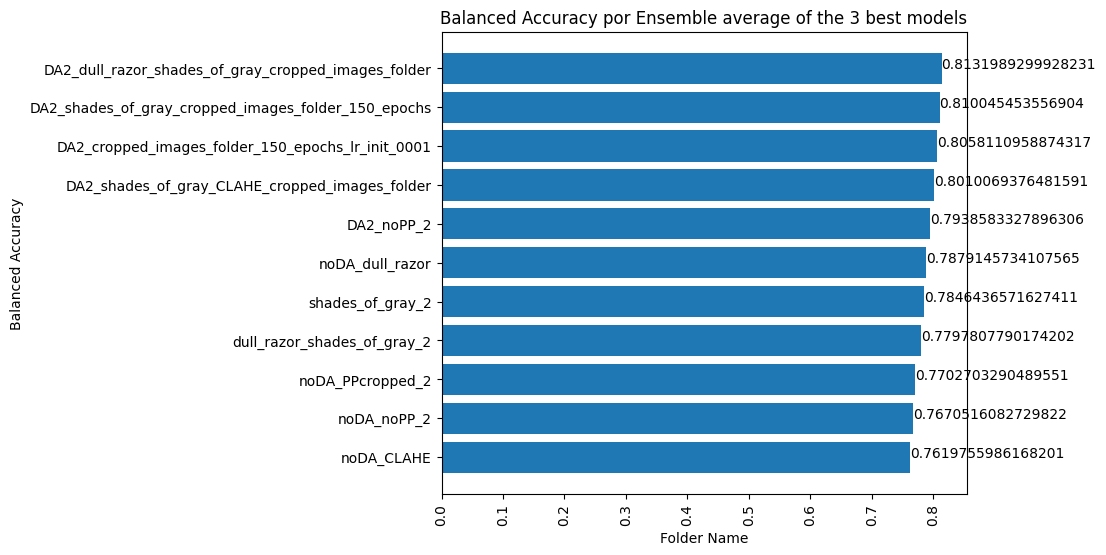

In [20]:
df.sort_values(by=['balanced_accuracy'], ascending=True, inplace=True)
folder_names = df['folder_name'].values
balanced_accuracy = df['balanced_accuracy'].values

plt.figure(figsize=(14, 6))
plt.barh(folder_names, balanced_accuracy)
plt.xticks(rotation=90)
# adjust right border
plt.subplots_adjust(right=.5)
for index, value in enumerate(balanced_accuracy):
    plt.text(value, index, str(value))
    
plt.xlabel('Folder Name')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy por Ensemble average of the 3 best models')
plt.show()